In [1]:
!pip install gym_super_mario_bros==7.3.0 nes_py

     ---------------------------------------- 1.1/1.1 MB 2.9 MB/s eta 0:00:00
  Attempting uninstall: pyglet
    Found existing installation: pyglet 2.0.20
    Uninstalling pyglet-2.0.20:
      Successfully uninstalled pyglet-2.0.20


# GAME SETUP

In [2]:
#import the game

import gym_super_mario_bros
#import the coontroller
from nes_py.wrappers import JoypadSpace
#import the simplified movement
from gym_super_mario_bros.actions import SIMPLE_MOVEMENT
import gym

In [3]:
# Setup game
env = gym_super_mario_bros.make('SuperMarioBros-v0')
env = JoypadSpace(env, SIMPLE_MOVEMENT)

In [4]:
SIMPLE_MOVEMENT[env.action_space.sample()]


['right', 'A']

In [5]:
SIMPLE_MOVEMENT

[['NOOP'],
 ['right'],
 ['right', 'A'],
 ['right', 'B'],
 ['right', 'A', 'B'],
 ['A'],
 ['left']]

In [6]:
done = True
for step in range(100000):
    if done:
        state = env.reset()
    state, reward, done, info = env.step(env.action_space.sample())[:4]
    env.render()

env.close()

c:\Users\acer\anaconda3\lib\site-packages\pyglet\image\codecs\wic.py:289: UserWarning: [WinError -2147417850] Cannot change thread mode after it is set
  warnings.warn(str(err))
c:\Users\acer\anaconda3\lib\site-packages\gym_super_mario_bros\smb_env.py:148: RuntimeWarning: overflow encountered in scalar subtract
  return (self.ram[0x86] - self.ram[0x071c]) % 256


KeyboardInterrupt: 

In [7]:
env.close()

# 2. Preprocess Environment

In [8]:
!pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu117


Looking in indexes: https://download.pytorch.org/whl/cu117


In [9]:
pip install stable-baselines3[extra]


Note: you may need to restart the kernel to use updated packages.


In [10]:
# Import Frame Stacker Wrapper and GrayScaling Wrapper
from gym.wrappers import GrayScaleObservation
# Import Vectorization Wrappers
from stable_baselines3.common.vec_env import VecFrameStack, DummyVecEnv
# Import Matplotlib to show the impact of frame stacking
from matplotlib import pyplot as plt

In [11]:
# 1. Create the base environment
env = gym_super_mario_bros.make('SuperMarioBros-v0')
# 2. Simplify the controls
env = JoypadSpace(env, SIMPLE_MOVEMENT)
# 3. Grayscale
env = GrayScaleObservation(env, keep_dim=True)
# 4. Wrap inside the Dummy Environment
env = DummyVecEnv([lambda: env])
# 5. Stack the frames
env = VecFrameStack(env, 4, channels_order='last')

In [12]:
state = env.reset()

In [13]:
state, reward, done, info = env.step([5])

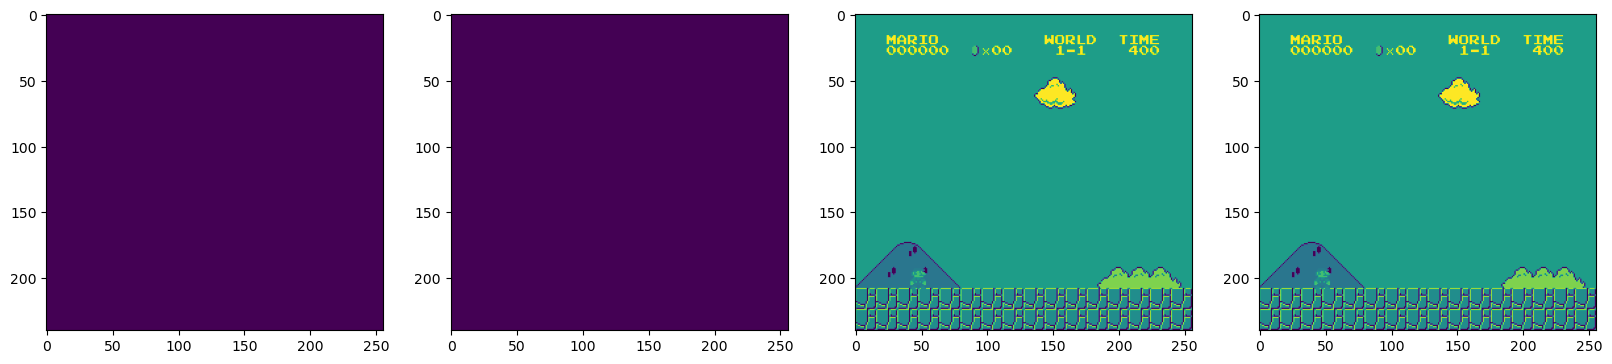

In [14]:
plt.figure(figsize=(20,16))
for idx in range(state.shape[3]):
    plt.subplot(1,4,idx+1)
    plt.imshow(state[0][:,:,idx])
plt.show()

# 3. Train the RL Model

In [15]:
# Import os for file path management
import os
# Import PPO for algos
from stable_baselines3 import PPO
# Import Base Callback for saving models
from stable_baselines3.common.callbacks import BaseCallback

In [16]:
class TrainAndLoggingCallback(BaseCallback):

    def __init__(self, check_freq, save_path, verbose=1):
        super(TrainAndLoggingCallback, self).__init__(verbose)
        self.check_freq = check_freq
        self.save_path = save_path

    def _init_callback(self):
        if self.save_path is not None:
            os.makedirs(self.save_path, exist_ok=True)

    def _on_step(self):
        if self.n_calls % self.check_freq == 0:
            model_path = os.path.join(self.save_path, 'best_model_{}'.format(self.n_calls))
            self.model.save(model_path)

        return True

In [17]:
CHECKPOINT_DIR = './cloud'
LOG_DIR = './logs'

In [18]:
# Setup model saving callback
callback = TrainAndLoggingCallback(check_freq=10000, save_path=CHECKPOINT_DIR)

In [19]:
# This is the AI model started
model = PPO('CnnPolicy', env, verbose=1, tensorboard_log=LOG_DIR, learning_rate=0.000001,n_steps=512)

Using cuda device
Wrapping the env in a VecTransposeImage.


In [21]:
# Train the AI model, this is where the AI model starts to learn
model.learn(total_timesteps=10000000, callback=callback)

Logging to ./logs\PPO_2
----------------------------
| time/              |     |
|    fps             | 109 |
|    iterations      | 1   |
|    time_elapsed    | 4   |
|    total_timesteps | 512 |
----------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 83            |
|    iterations           | 2             |
|    time_elapsed         | 12            |
|    total_timesteps      | 1024          |
| train/                  |               |
|    approx_kl            | 8.0132624e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.95         |
|    explained_variance   | 0.00799       |
|    learning_rate        | 1e-06         |
|    loss                 | 208           |
|    n_updates            | 40            |
|    policy_gradient_loss | 0.000342      |
|    value_loss           | 457           |
-------------------------

KeyboardInterrupt: 

In [22]:
model.save('thisisatestmodel')

# 4. Test this shit out

In [23]:
# Load model
model = PPO.load('./cloud/best_model_340000')

In [24]:
state = env.reset()

In [25]:
# Start the game
state = env.reset()
# Loop through the game
while True:

    action, _ = model.predict(state)
    state, reward, done, info = env.step(action)
    env.render()

KeyboardInterrupt: 

In [26]:
env.close()